# Training / Testing Dataset

In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## All Data

In [32]:
all_data = pd.read_csv('data/UniversalBank.csv')
all_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Target - Personal Loan

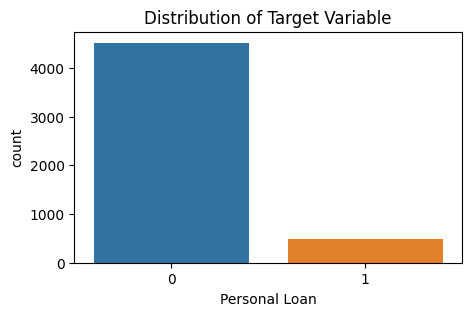

In [33]:
plt.figure(figsize = (5, 3))
sns.countplot(x='Personal Loan', data=all_data).set_title('Distribution of Target Variable')
plt.show()

In [34]:
all_data.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64

## Selected Features - Income, Mortgage and Education

In [35]:
features = ['Income', 'Mortgage', 'Education']
target = 'Personal Loan'

x_train, x_test, y_train, y_test = train_test_split(all_data[features], all_data[target], test_size=0.33, random_state=42)

In [36]:
x_train

,Income,Mortgage,Education
1522,101,256,3
835,142,193,1
358,141,0,1
138,42,0,1
299,159,0,3
...,...,...,...
4426,140,0,1
466,13,0,3
3092,113,325,1
3772,152,0,1


# Unfitted Pipeline Overview

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return x[self.key].values.reshape(-1, 1)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

income = Pipeline([
    ('selector', FeatureSelector(key='Income')),
    ('standard', StandardScaler())
])

mortgage = Pipeline([
    ('selector', FeatureSelector(key='Mortgage')),
    ('standard', StandardScaler())
])

education = Pipeline([
    ('selector', FeatureSelector(key='Education')),
    ('standard', StandardScaler())
])

In [39]:
from sklearn.pipeline import FeatureUnion
from sklearn.neural_network import MLPClassifier

feats = FeatureUnion([
    ('income', income), 
    ('mortgage', mortgage),
    ('education', education)
])

mlp_classifier_pipeline = Pipeline([
    ('features', feats),
    ('classifier', MLPClassifier()),
])

mlp_classifier_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('income',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(key='Income')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('mortgage',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(key='Mortgage')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('education',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(key='Education')),
                                                                 ('standard',
                                                                  StandardScaler())]))])),
                ('classifier', MLPClassifier())])

# Training / Evaluation

## Train Model 1

In [40]:
from ModelInterface import ModelInterface

mlp_classifier_v1 = ModelInterface("mlp_classifier_v1")

hyper_params = {
    'classifier__hidden_layer_sizes': 20,
    'classifier__activation': 'logistic',
    'classifier__solver': 'adam', 
    'classifier__random_state': 0, 
    'classifier__max_iter': 500
}

mlp_classifier_v1.fit(pipeline=mlp_classifier_pipeline, x_train=x_train, y_train=y_train, hyper_params=hyper_params)

mlp_classifier_v1.save()

mlp_classifier_v1 (model) has been saved in mlp_classifier_v1/mlp_classifier_v1.pkl
mlp_classifier_v1 (hyper parameters) have been saved in mlp_classifier_v1/mlp_classifier_v1.yaml


## Evaluate Model 1

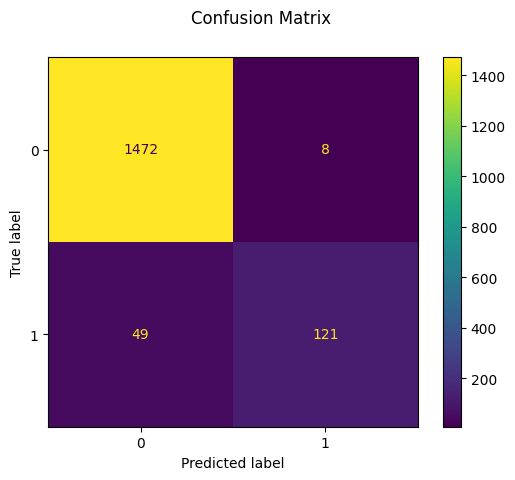

In [41]:
mlp_classifier_v1.test(x_test, y_test)

## Train Model 2

In [42]:
mlp_classifier_v2 = ModelInterface("mlp_classifier_v2")

hyper_params = {
    'classifier__hidden_layer_sizes': 20,
    'classifier__activation': 'tanh',
    'classifier__solver': 'lbfgs', 
    'classifier__random_state': 0, 
    'classifier__max_iter': 1000
}

mlp_classifier_v2.fit(pipeline=mlp_classifier_pipeline, x_train=x_train, y_train=y_train, hyper_params=hyper_params)

mlp_classifier_v2.save()

mlp_classifier_v2 (model) has been saved in mlp_classifier_v2/mlp_classifier_v2.pkl
mlp_classifier_v2 (hyper parameters) have been saved in mlp_classifier_v2/mlp_classifier_v2.yaml


## Evaluate Model 2

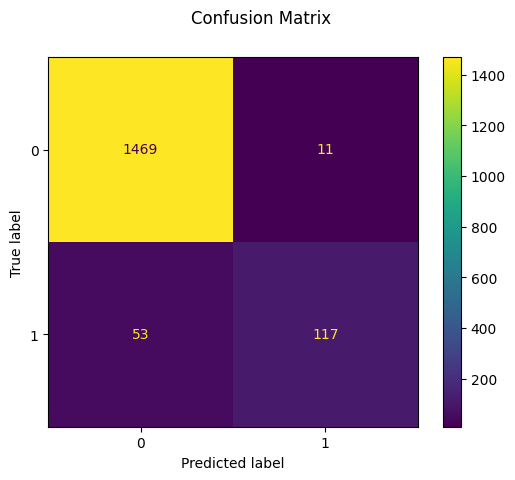

In [43]:
mlp_classifier_v2.test(x_test, y_test)

# Inference

## Generate Dummy Traffic

In [44]:
from random import gauss
import random
import pandas as pd

def generate_dummy_traffic(num_samples, features, income_param, mortage_param):
    
    data = []
    
    for _ in range(num_samples):
        data.append([gauss(*income_param), gauss(*mortage_param), random.randint(1,3)])

    df = pd.DataFrame(data=data, columns=features)
    
    return df

## Score Model 1

In [45]:
v1_traffic = generate_dummy_traffic(5000, features, (100, 50), (300, 200))
v1_traffic

,Income,Mortgage,Education
0,62.644062,112.634621,3
1,46.858977,-60.161184,1
2,13.954696,344.356749,2
3,108.813420,294.157722,2
4,156.559193,515.531680,3
...,...,...,...
4995,117.795855,165.172192,2
4996,88.599289,59.122410,3
4997,115.746577,245.197286,2
4998,94.457372,303.853816,3


In [46]:
mlp_classifier_v1.predict(input=v1_traffic)

array([0, 0, 0, ..., 1, 0, 0])

## Score Model 2

In [47]:
v2_traffic = generate_dummy_traffic(5000, features, (200, 100), (400, 300))
v2_traffic

,Income,Mortgage,Education
0,233.442269,268.458473,2
1,363.209873,774.568798,3
2,228.683690,660.075607,1
3,234.454112,439.139806,2
4,80.980899,386.315594,2
...,...,...,...
4995,193.880935,741.926809,2
4996,182.503688,214.811008,1
4997,160.340595,674.423320,2
4998,256.602746,509.673935,1


In [48]:
mlp_classifier_v2.predict(input=v2_traffic)

array([1, 1, 1, ..., 1, 1, 1])

# Monitoring

## Model 1 - Data Drift

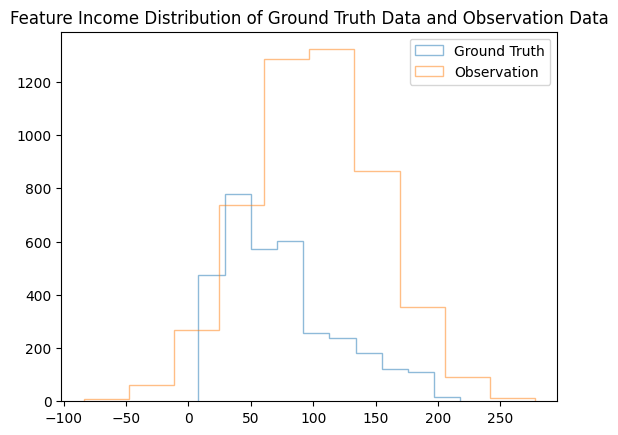

In [49]:
mlp_classifier_v1.monitor_data_drift(x_train, 'Income')

In [50]:
mlp_classifier_v1.calc_data_drift_score(x_train, 'Income')

Drift score for mlp_classifier_v1 is: 25.514569233946876


## Model 2 - Data Drift

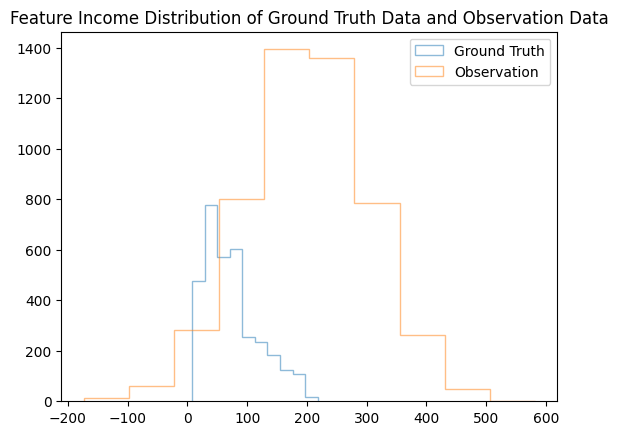

In [51]:
mlp_classifier_v2.monitor_data_drift(x_train, 'Income')

In [52]:
mlp_classifier_v2.calc_data_drift_score(x_train, 'Income')

Drift score for mlp_classifier_v2 is: 24.072122255309008


# Load Previous Model

## Load Model

In [53]:
previous_model = ModelInterface("mlp_classifier_v1")
previous_model.load()

## Show Hyper Parameters

In [54]:
previous_model.get_hyper_params()

{'classifier__activation': 'logistic',
 'classifier__hidden_layer_sizes': 20,
 'classifier__max_iter': 500,
 'classifier__random_state': 0,
 'classifier__solver': 'adam'}

## Show Previous Inferences

In [55]:
previous_model.get_inference_df()

,Income,Mortgage,Education,inference
0,62.644062,112.634621,3.0,0.0
1,46.858977,-60.161184,1.0,0.0
2,13.954696,344.356749,2.0,0.0
3,108.813420,294.157722,2.0,1.0
4,156.559193,515.531680,3.0,1.0
...,...,...,...,...
4995,117.795855,165.172192,2.0,1.0
4996,88.599289,59.122410,3.0,0.0
4997,115.746577,245.197286,2.0,1.0
4998,94.457372,303.853816,3.0,0.0


## Score with Current Traffic

In [56]:
new_traffic = generate_dummy_traffic(1000, features, (200, 10), (250, 50))

In [57]:
previous_model.predict(new_traffic)

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

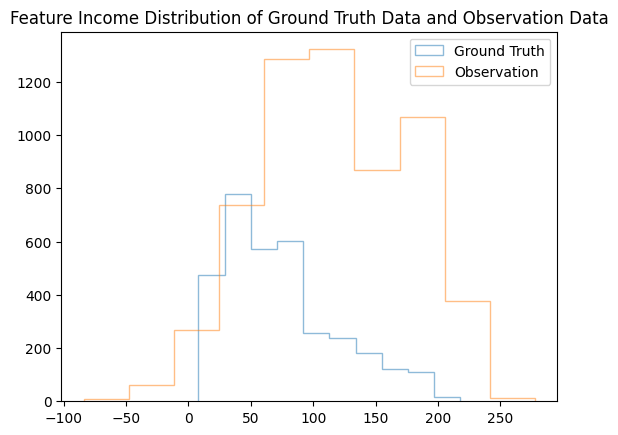

In [58]:
previous_model.monitor_data_drift(x_train, 'Income')